<a href="https://colab.research.google.com/github/inesnft/Athlete-Performance-Prediction/blob/main/Projet_AAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook essaie


In [2]:
import pandas as pd
from pathlib import Path
import urllib.request

def load_football_data(filename: str = "Euro-Football_2012-2023.csv") -> pd.DataFrame:

    # Chemins et URL
    DATASETS_PATH = Path("datasets")
    CSV_FILE_PATH = DATASETS_PATH / filename # Le chemin local pour le fichier CSV

    # L'URL RAW (Brute) pointant vers le nouveau fichier CSV sur GitHub

    URL_GITHUB_CSV = (
        "https://raw.githubusercontent.com/inesnft/Athlete-Performance-Prediction/main/Euro-Football_2012-2023.csv"
    )

    # 1. Vérification et téléchargement
    if not CSV_FILE_PATH.is_file():
        # Crée le répertoire 'datasets' si nécessaire
        DATASETS_PATH.mkdir(parents=True, exist_ok=True)

        print(f"Téléchargement de {filename} depuis GitHub...")
        # Téléchargement du fichier CSV
        urllib.request.urlretrieve(URL_GITHUB_CSV, CSV_FILE_PATH)
        print("Téléchargement terminé.")

    # 2. Chargement des données CSV
    try:
        # pd.read_csv lit le fichier téléchargé localement
        data_frame = pd.read_csv(CSV_FILE_PATH, sep=';')
        return data_frame
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier CSV : {e}")
        return pd.DataFrame()

football_data = load_football_data()

# Vérification
if not football_data.empty:
    print("DataFrame 'football_data' chargé à partir du CSV.")
football_data.head()

Téléchargement de Euro-Football_2012-2023.csv depuis GitHub...
Téléchargement terminé.
DataFrame 'football_data' chargé à partir du CSV.


,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,FTHG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,England,Premier League,E0,2012-2013,2012-08-18 00:00:00,Arsenal,Sunderland,C Foy,0.0,...,4.0,2.0,12.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0
1,1,England,Premier League,E0,2012-2013,2012-08-18 00:00:00,Fulham,Norwich,M Oliver,5.0,...,9.0,2.0,12.0,11.0,6.0,3.0,0.0,0.0,0.0,0.0
2,2,England,Premier League,E0,2012-2013,2012-08-18 00:00:00,Newcastle,Tottenham,M Atkinson,2.0,...,4.0,6.0,12.0,8.0,3.0,5.0,2.0,2.0,0.0,0.0
3,3,England,Premier League,E0,2012-2013,2012-08-18 00:00:00,QPR,Swansea,L Probert,0.0,...,11.0,8.0,11.0,14.0,5.0,3.0,2.0,2.0,0.0,0.0
4,4,England,Premier League,E0,2012-2013,2012-08-18 00:00:00,Reading,Stoke,K Friend,1.0,...,3.0,3.0,9.0,14.0,4.0,3.0,2.0,4.0,0.0,1.0


In [7]:
football_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66147 entries, 0 to 66146
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        66147 non-null  int64  
 1   Country   66147 non-null  object 
 2   League    66147 non-null  object 
 3   Div       66121 non-null  object 
 4   Season    66147 non-null  object 
 5   Date      66121 non-null  object 
 6   HomeTeam  66121 non-null  object 
 7   AwayTeam  66121 non-null  object 
 8   Referee   13620 non-null  object 
 9   FTHG      66119 non-null  float64
 10  FTAG      66119 non-null  float64
 11  FTR       66119 non-null  object 
 12  HTHG      66030 non-null  float64
 13  HTAG      66030 non-null  float64
 14  HTR       66030 non-null  object 
 15  HS        50116 non-null  float64
 16  AS        50116 non-null  float64
 17  HST       50116 non-null  float64
 18  AST       50116 non-null  float64
 19  HF        48778 non-null  float64
 20  AF        48778 non-null  fl

In [12]:
football_data["Country"].value_counts()

,count
Country,
England,10748
Spain,9676
Italy,9193
France,8504
Germany,7028
Scotland,4556
Turkey,3763
Netherlands,3437
Portugal,3372


In [11]:
football_data["League"].value_counts()

,count
League,
Premier League,6951
Championship,6373
Segunda Division,5315
Serie B,4827
Serie A,4366
Primera Division,4361
Division 2,4270
Le Championnat,4234
Futbol Ligi 1,3763


In [15]:
import matplotlib.pyplot as plt
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "histo"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

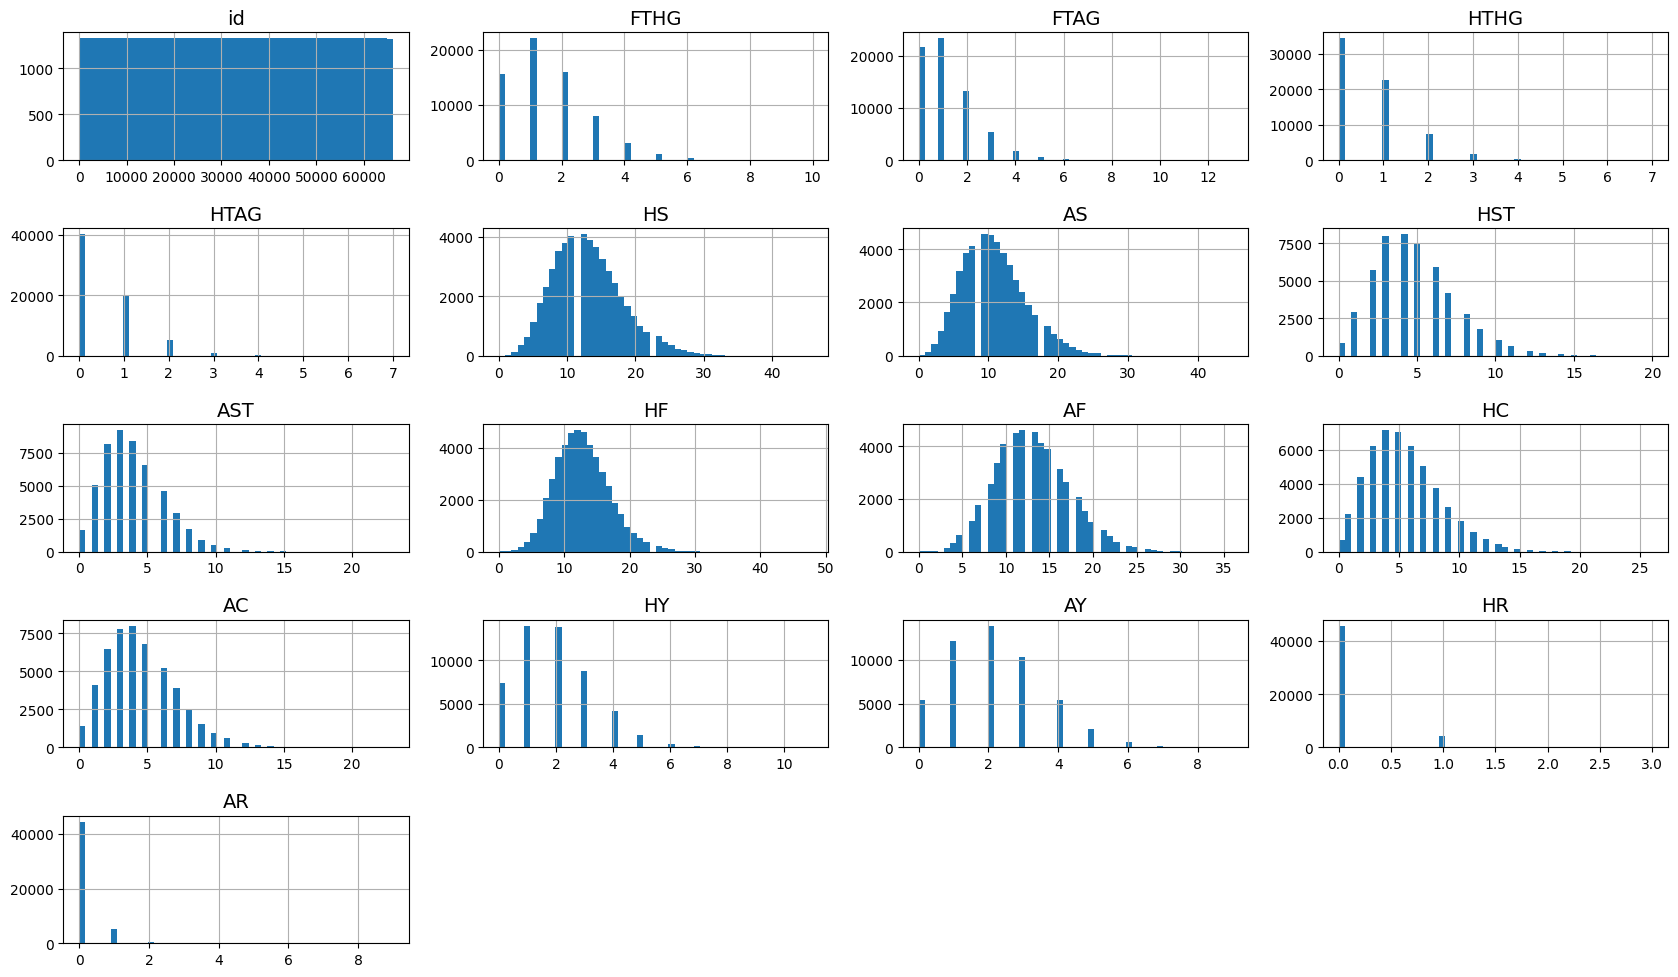

In [17]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

football_data.hist(bins=50, figsize=(17, 10))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Souvent plus esthétique que matplotlib seul


# --- 1. Agrégation des buts à domicile (FTHG) ---
goals_home = football_data.groupby('HomeTeam')['FTHG'].sum().reset_index() # rest index permet de transformer les équipes en chiffres
goals_home.columns = ['Team', 'TotalGoals']

# --- 2. Agrégation des buts à l'extérieur (FTAG) ---
goals_away = football_data.groupby('AwayTeam')['FTAG'].sum().reset_index()
goals_away.columns = ['Team', 'TotalGoals']

# --- 3. Combinaison des résultats ---
# On fusionne les deux DataFrames sur la colonne 'Team' et on fait la somme des buts totaux.
total_goals = pd.concat([goals_home, goals_away])
total_goals_by_team = total_goals.groupby('Team')['TotalGoals'].sum().reset_index()

# Renommage des colonnes pour la clarté
total_goals_by_team.columns = ['Team', 'Goals']

# Trier les équipes par nombre de buts total pour la visualisation
total_goals_sorted = total_goals_by_team.sort_values(by='Goals', ascending=False)

print("Top 10 des équipes par Buts Totaux :")
print(total_goals_sorted.head(10))

Top 10 des équipes par Buts Totaux :
              Team   Goals
50       Barcelona  1085.0
55   Bayern Munich  1058.0
101         Celtic  1050.0
374    Real Madrid  1029.0
283       Man City  1026.0
346       Paris SG  1016.0
10            Ajax   978.0
335  PSV Eindhoven   955.0
267      Liverpool   899.0
60         Benfica   892.0
